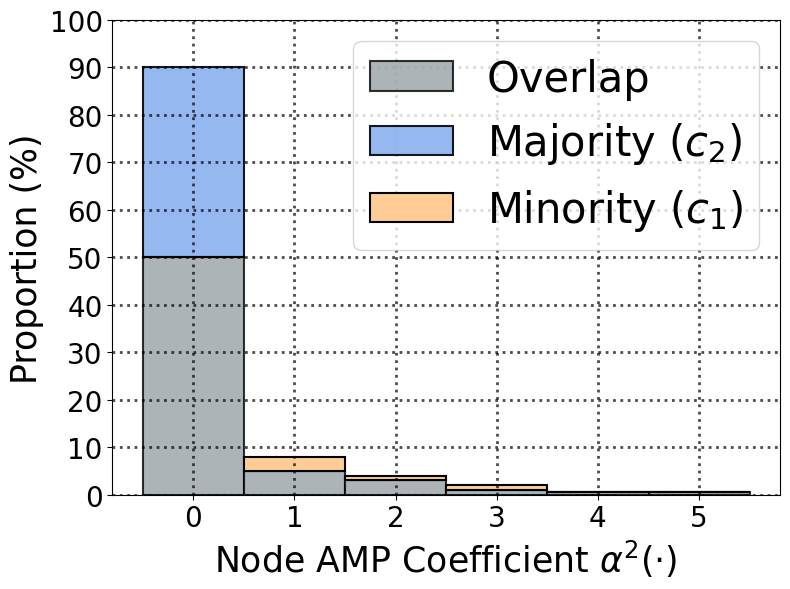

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 设置字体大小
text_size = 25

def hex_to_rgb(hex_color):
    """将十六进制颜色转换为 RGB"""
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def rgb_to_hex(rgb_color):
    """将 RGB 颜色转换为十六进制"""
    return '#{:02X}{:02X}{:02X}'.format(*rgb_color)

def mix_colors(color1, color2, alpha=0.5):
    """混合两种颜色"""
    rgb1 = hex_to_rgb(color1)
    rgb2 = hex_to_rgb(color2)
    mixed_rgb = tuple(int(alpha * c1 + (1 - alpha) * c2) for c1, c2 in zip(rgb1, rgb2))
    return rgb_to_hex(mixed_rgb)

# 示例颜色
color1 = "6D9EEB"  # 蓝色
color2 = "F6B26B"  # 橙色
mixed_color = "#97a1a5" # 混合色

# 数据准备
bins = np.arange(6)  # 直方图的区间
majority = [90, 5, 3, 1, 0.5, 0.5]  # 多数类数据
minority = [50, 8, 4, 2, 0.5, 0.5]  # 少数类数据
overlap = [min(maj, mino) for maj, mino in zip(majority, minority)]  # 计算重叠部分

# 绘制图表
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 1  # 调整柱宽，确保柱子之间没有间隙

# 绘制重叠部分（灰色，在底部）
ax.bar(bins, overlap, width=bar_width, color=mixed_color, edgecolor='black', linewidth=1.5, label='Overlap', alpha=0.8)

# 绘制蓝色部分（多数类非重叠部分，在重叠区域之上）
blue_part = [maj - ov for maj, ov in zip(majority, overlap)]
ax.bar(bins, blue_part, width=bar_width, color='#8ab1ef', edgecolor='black', linewidth=1.5, bottom=overlap, label='Majority ($c_2$)', alpha=0.9)

# 绘制橙色部分（少数类非重叠部分，在重叠区域之上）
orange_part = [mino - ov for mino, ov in zip(minority, overlap)]
ax.bar(bins, orange_part, width=bar_width, color='#ffcc95', edgecolor='black', linewidth=1.5, bottom=overlap, label='Minority ($c_1$)', alpha=1)

# 设置坐标轴标签和刻度
ax.set_xlabel('Node AMP Coefficient $\\alpha^2(\\cdot)$', fontsize=text_size)
ax.set_ylabel('Proportion (%)', fontsize=text_size)
ax.set_xticks(bins)
ax.tick_params(axis='both', which='major', labelsize=text_size - 5)

# 修改纵轴刻度密集度为10%
ax.set_yticks(np.arange(0, 101, 10))

# 显示网格（点状样式）
ax.grid(True, linestyle='dotted', linewidth=2.0, alpha=0.7, color='black')

# 添加图例并调整大小
ax.legend(loc='upper right', fontsize=30, frameon=True)

# 调整图表布局
plt.tight_layout()

# 显示图表
plt.show()
